<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool_05_Linux/blob/main/Linux10_Kubernetes_Registry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Azure Docker Registry

https://learn.microsoft.com/ko-kr/azure/aks/tutorial-kubernetes-prepare-acr?tabs=azure-cli

>## 1) ACR (Azure Container Registry)
- 컨테이너 이미지가 모이는 곳
- Docker Hub 역할

>## 2) AKS (Azure Kubernetes Service)
- POD이 모이는 곳
- Minikube 역할

# 2. 실습

>## 1) 사전준비 : Azure CLI 설치

- https://learn.microsoft.com/ko-kr/cli/azure/install-azure-cli
- 우분투 설치 : https://learn.microsoft.com/ko-kr/cli/azure/install-azure-cli-linux?pivots=apt

In [ ]:
curl -sL https://aka.ms/InstallAzureCLIDeb | sudo bash

- 설치 확인

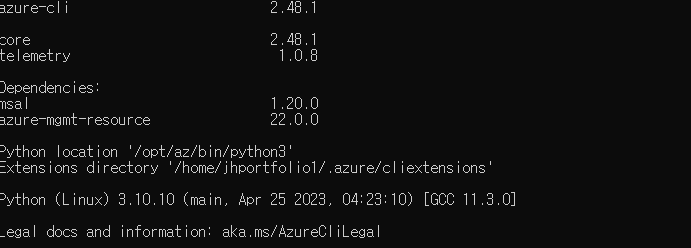

>## 2) CMD에서 Azure 로그인

In [ ]:
az login

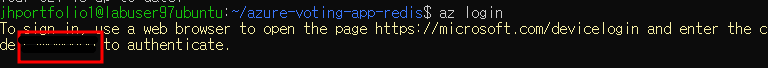

- https://microsoft.com/devicelogin 접속
- 코드에 CMD에 나온 코드 입력

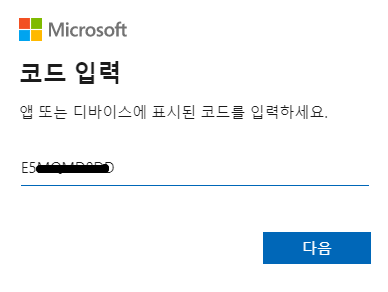

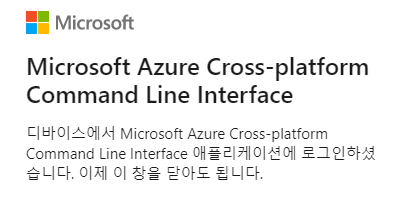

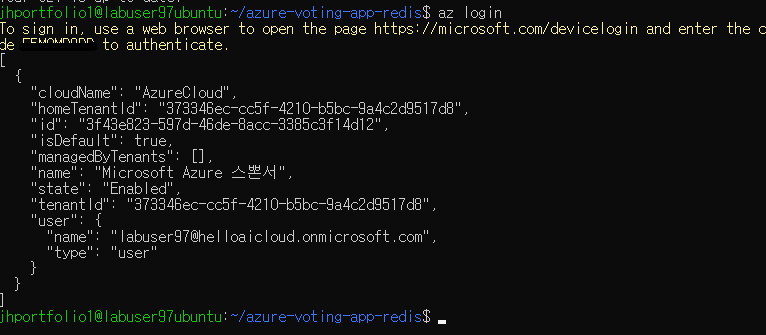

>## 3) 리소스그룹 및 컨테이너 레지스트리 생성

- 연결된 Azure에서 리소스 그룹 확인하기

In [ ]:
az list --output table

- 리소스 그룹 만들기

In [ ]:
az group create --name myResourceGroup --location eastus

- 리소스 그룹에 ACR 인스턴스 생성

In [ ]:
az acr create --resource-group myResourceGroup --name <acrName> --sku Basic

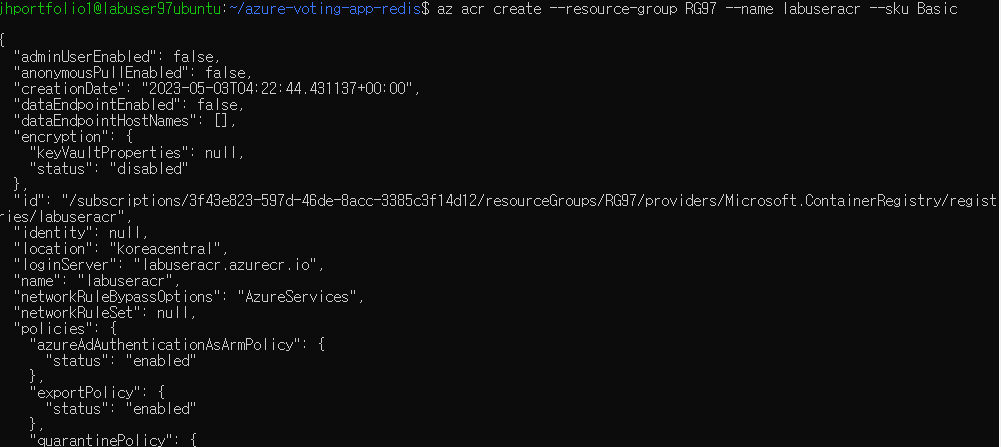

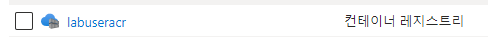

>## 4) 컨테이너 레지스트리 로그인

In [ ]:
az acr login --name <acrName>

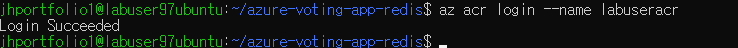

>## 5) 컨테이너 이미지 태그 지정

- 이미지 목록 확인

In [ ]:
docker images

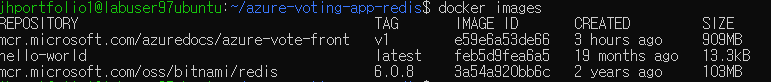

- 로그인 서버 주소 얻기

In [ ]:
az acr list --resource-group myResourceGroup --query "[].{acrLoginServer:loginServer}" --output table

In [ ]:
az acr list --resource-group RG97 --query "[].{acrLoginServer:loginServer}" --output table

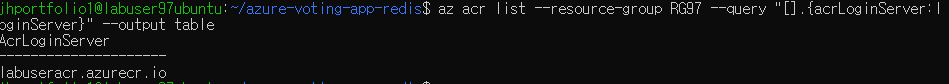

- 컨테이너 레지스트리의 acrLoginServer 주소 사용, azure-vote-front 이미지에 태그 지정

In [ ]:
docker tag mcr.microsoft.com/azuredocs/azure-vote-front:v1 (여기에 자기 ACR 주소)/azure-vote-front:v1  #주소는 ACR이름.azurecr.io 형태

In [ ]:
docker tag mcr.microsoft.com/azuredocs/azure-vote-front:v1 labuseracr.azurecr.io/azure-vote-front:v1

- 확인

In [ ]:
docker images

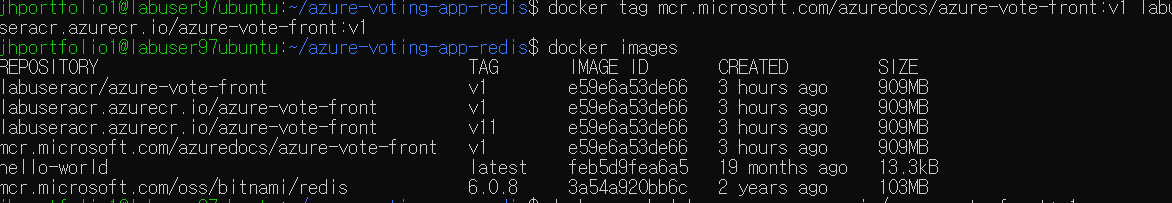

>## 6) 레지스트리 이미지 푸시

- ACR 인스턴스에 Azure-vote-front 이미지 푸시

In [ ]:
docker push (여기에 자기 ACR 주소)/azure-vote-front:v1

In [ ]:
docker push labuseracr.azurecr.io/azure-vote-front:v1  #주소는 ACR이름.azurecr.io 형태

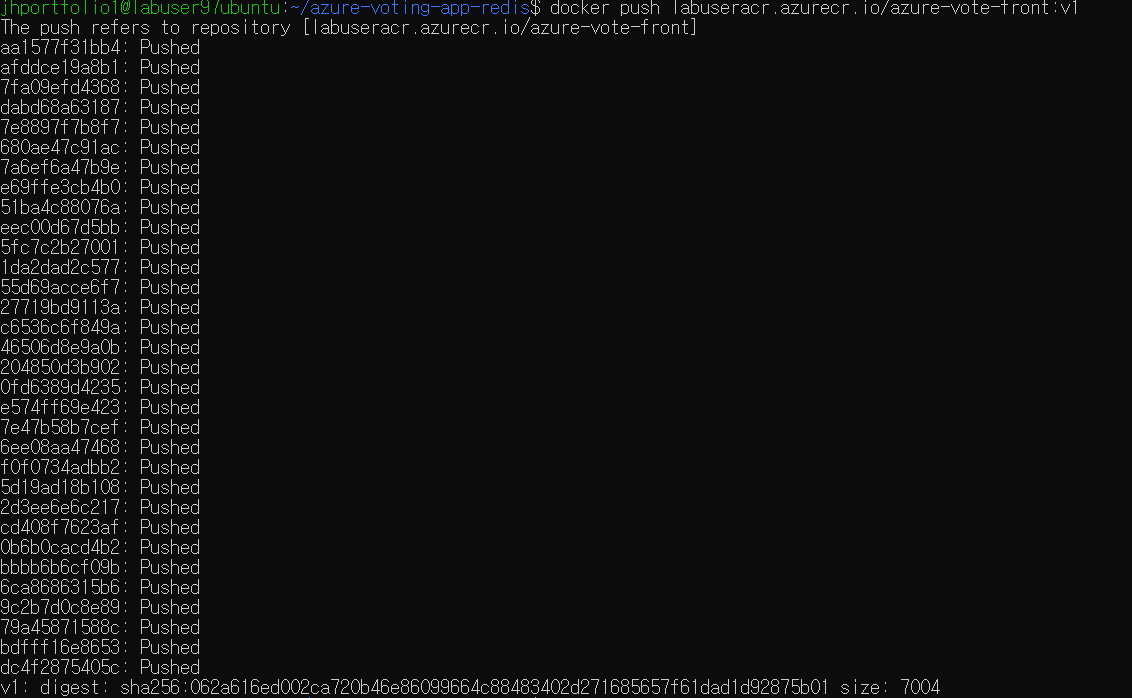

- ACR인스턴스에 푸시된 이미지 목록 반환

In [ ]:
az acr repository list --name <acrName> --output table

In [ ]:
az acr repository list --name labuseracr.azurecr.io --output table

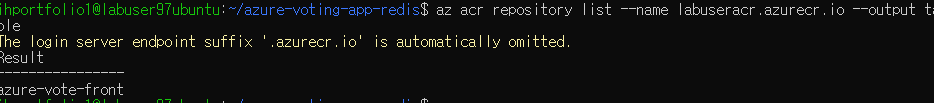